Ejercicio: Análisis de Producción Petrolera
Objetivo: Cargar un archivo CSV, analizar información clave y visualizar los resultados.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('datos/produccion_petrolera_10000_ejercicio.csv',index_col=['Pozo','Fecha'],parse_dates=['Fecha'])

In [22]:
df.head()

,,Produccion_Barriles,Presion_PSI,Temperatura_C,Agua_Producida_Barriles,Estado
Pozo,Fecha,,,,,
Pozo C,2022-08-04,1715,2677,61.49,268,Mantenimiento
Pozo D,2022-12-17,1886,2007,90.67,458,Cerrado
Pozo A,2022-08-06,2189,2602,75.20,68,Cerrado
Pozo C,2022-10-18,1684,2478,118.43,180,Mantenimiento
Pozo D,2022-01-06,2167,2038,99.73,272,Mantenimiento


In [23]:
df.describe()

,Produccion_Barriles,Presion_PSI,Temperatura_C,Agua_Producida_Barriles
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,1498.882500,2400.022000,89.956494,274.021600
std,406.476227,230.232691,17.299458,129.708258
min,800.000000,2000.000000,60.020000,50.000000
25%,1142.000000,2199.000000,74.890000,161.000000
50%,1500.000000,2401.000000,89.800000,274.000000
75%,1848.000000,2600.000000,104.917500,387.000000
max,2199.000000,2799.000000,120.000000,499.000000


In [24]:
#muestra los tipos de datos de cada columna
df.dtypes

Produccion_Barriles          int64
Presion_PSI                  int64
Temperatura_C              float64
Agua_Producida_Barriles      int64
Estado                      object
dtype: object

Paso 2: Análisis básico
¿Cuántos registros hay por pozo?

¿Cuál es el promedio de producción de cada pozo?

¿Qué pozo tiene la presión media más alta?

In [25]:
# Cuantos registros hay por cada pozo
df.groupby('Pozo').size()

Pozo
Pozo A    2043
Pozo B    2032
Pozo C    2004
Pozo D    1903
Pozo E    2018
dtype: int64

In [26]:
# Cual es el promedio de produccion de cada pozo
df.groupby('Pozo')['Produccion_Barriles'].mean()

Pozo
Pozo A    1499.085658
Pozo B    1495.391240
Pozo C    1502.992515
Pozo D    1498.425118
Pozo E    1498.542121
Name: Produccion_Barriles, dtype: float64

In [27]:
#que pozo tiene la mayor Presion_PSI
pozo_max = df.groupby('Pozo')['Presion_PSI'].agg(['mean', 'max']).sort_values(by='max', ascending=False).head(1)
print(pozo_max)
#que pozo tiene la mayor Presion_PSI promedio
pozo_max_promedio = df.groupby('Pozo')['Presion_PSI'].mean().sort_values(ascending=False).head(1)
print(pozo_max_promedio)

               mean   max
Pozo                     
Pozo A  2403.322075  2799
Pozo
Pozo D    2410.404624
Name: Presion_PSI, dtype: float64


 Paso 3: Visualización
Crea un gráfico de barras con el promedio de producción por pozo.

Haz un gráfico de líneas que muestre la producción promedio por fecha (agregando por día).

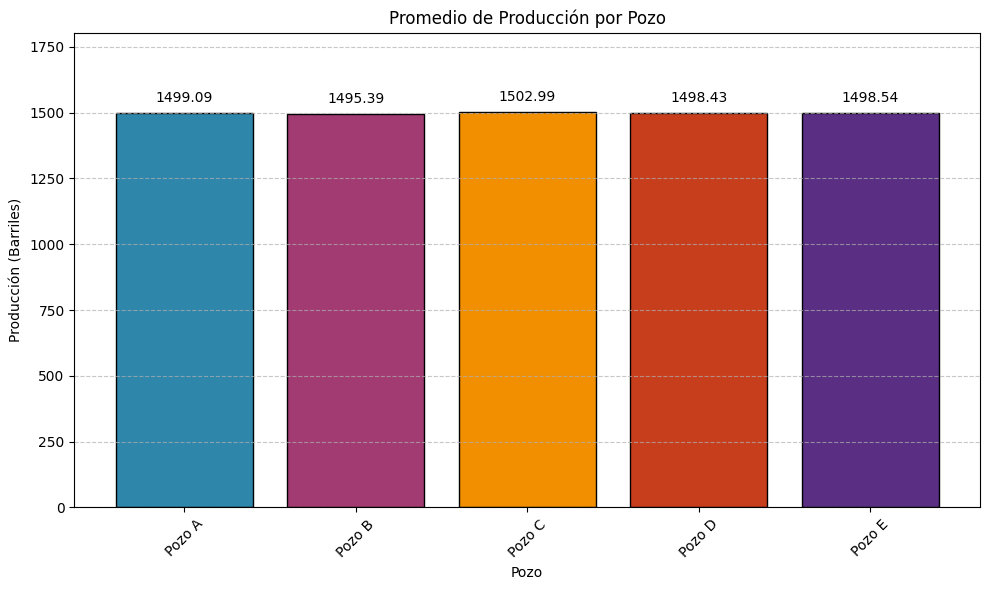

In [52]:
#grafica de barras que muestre el promedio de produccion por pozo
produccion_por_pozo = df.groupby('Pozo')['Produccion_Barriles'].mean()

plt.figure(figsize=(10, 6))
plt.bar(produccion_por_pozo.index, produccion_por_pozo.values, color=['#2E86AB','#A23B72','#F18F01','#C73E1D','#592E83'], edgecolor='black')
plt.title('Promedio de Producción por Pozo')
plt.xlabel('Pozo')
plt.ylabel('Producción (Barriles)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, produccion_por_pozo.max() * 1.2)  # Ajusta el límite superior del eje y
#mostrar el valor de cada barra
for i, v in enumerate(produccion_por_pozo.values):
    plt.text(i, v + 0.02 * produccion_por_pozo.max(), f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('barras.png', dpi=300)
plt.show()


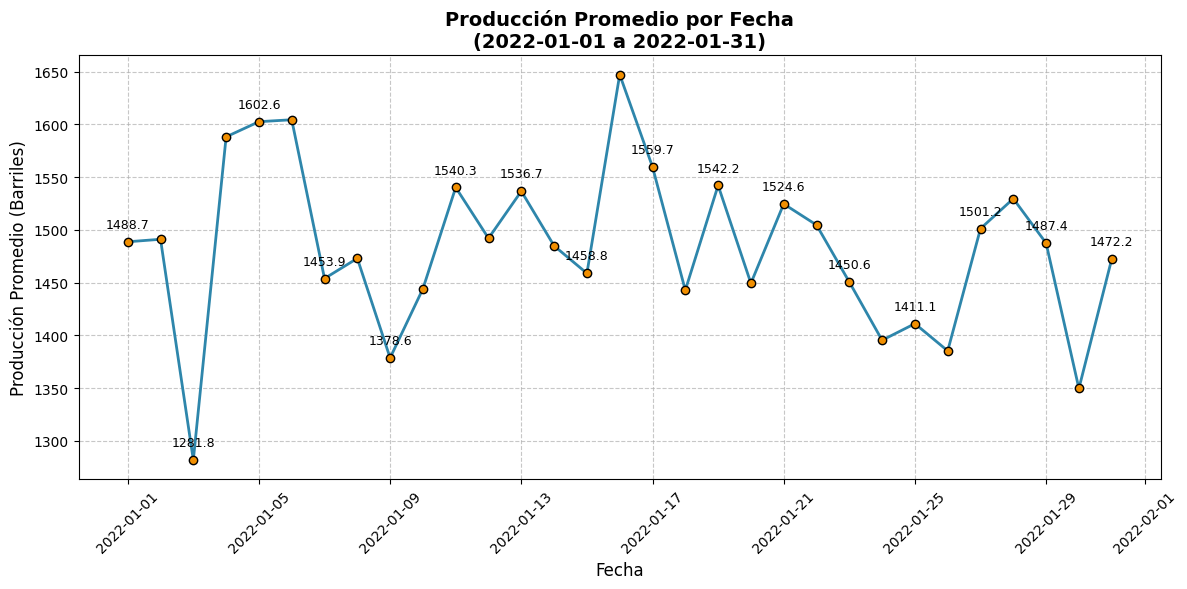

Mostrando datos desde 2022-01-01 hasta 2022-01-31
Total de días: 31
Producción promedio en el período: 1482.97 barriles


In [51]:
#Haz un gráfico de líneas que muestre la producción promedio por fecha (agregando por día).
produccion_por_fecha = df.groupby(df.index.get_level_values('Fecha'))['Produccion_Barriles'].mean()

# Definir ventana de fechas específica
fecha_inicio = '2022-01-01'
fecha_fin = '2022-01-31'

# Filtrar datos por la ventana de fechas
mask = (produccion_por_fecha.index >= fecha_inicio) & (produccion_por_fecha.index <= fecha_fin)
produccion_filtrada = produccion_por_fecha[mask]

plt.figure(figsize=(12, 6))
plt.plot(produccion_filtrada.index, produccion_filtrada.values, marker='o', linestyle='-', 
         color='#2E86AB', linewidth=2, markersize=6, markerfacecolor='#F18F01', markeredgecolor='black')
plt.title(f'Producción Promedio por Fecha\n({fecha_inicio} a {fecha_fin})', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Producción Promedio (Barriles)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Agregar valores en cada punto
for i, (fecha, valor) in enumerate(zip(produccion_filtrada.index, produccion_filtrada.values)):
    if i % 2 == 0:  # Mostrar solo cada 2 valores para evitar sobreposición
        plt.annotate(f'{valor:.1f}', (fecha, valor), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('lineas.png', dpi=300)
plt.show()


print(f"Mostrando datos desde {fecha_inicio} hasta {fecha_fin}")
print(f"Total de días: {len(produccion_filtrada)}")
print(f"Producción promedio en el período: {produccion_filtrada.mean():.2f} barriles")


Crea un dashboard que muestre informacion importante para apoyarte en toma de decisiones.

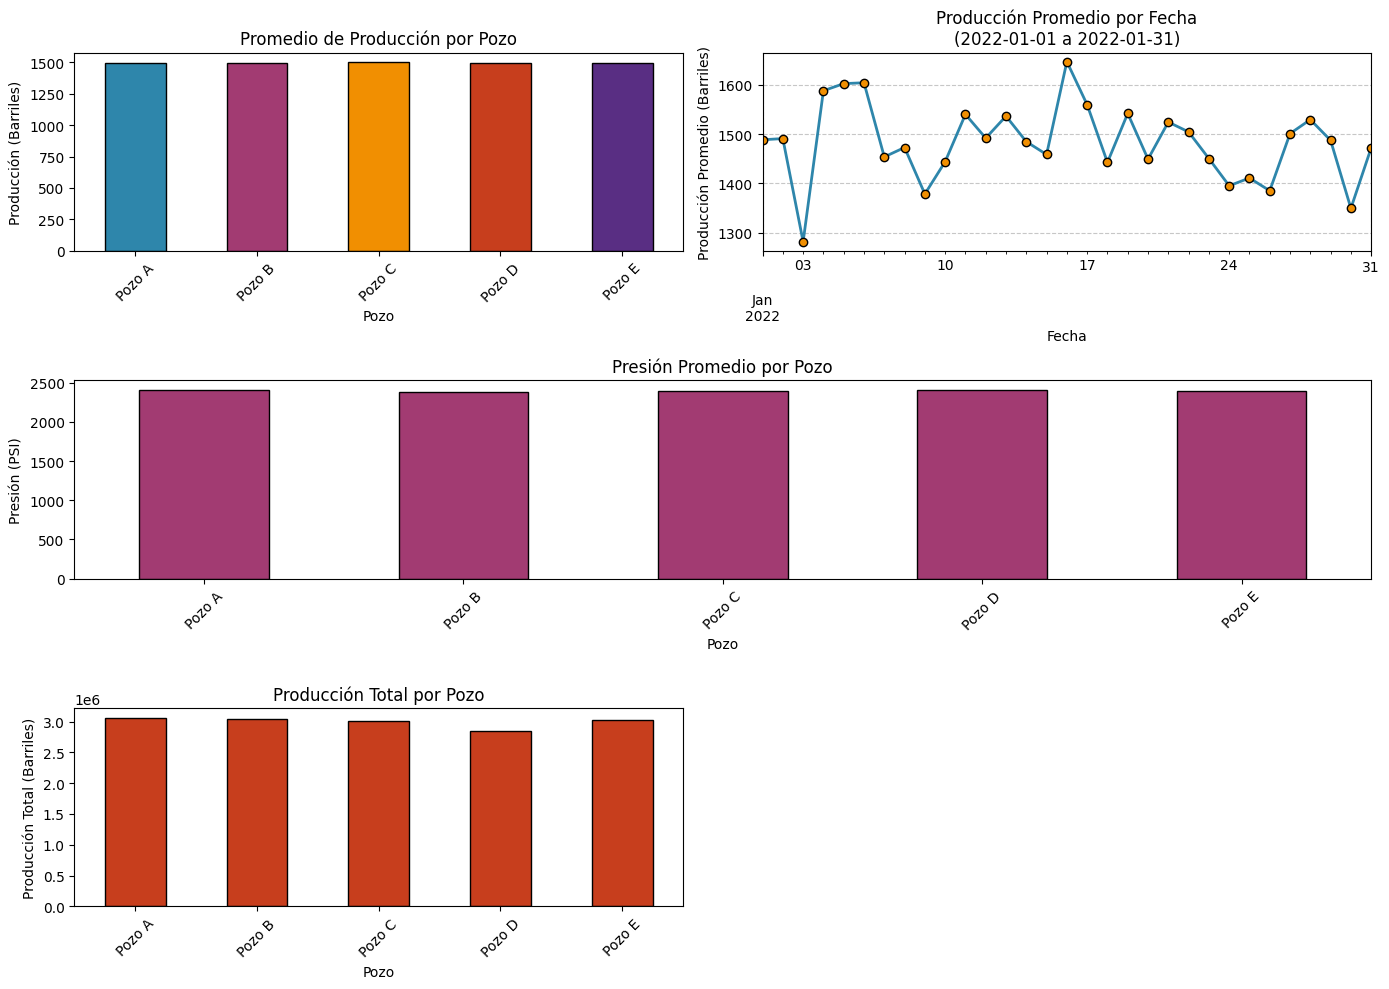

In [50]:
#Dashbord que muester informacion importante para la toma de decisiones con matplotlib
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[1, 1])
# Gráfico 1: Promedio de Producción por Pozo
ax1 = fig.add_subplot(gs[0, 0])
produccion_por_pozo.plot(kind='bar', ax=ax1, color=['#2E86AB','#A23B72','#F18F01','#C73E1D','#592E83'], edgecolor='black')
ax1.set_title('Promedio de Producción por Pozo')
ax1.set_xlabel('Pozo')
ax1.set_ylabel('Producción (Barriles)')
ax1.set_xticklabels(produccion_por_pozo.index, rotation=45)
# Gráfico 2: Producción Promedio por Fecha
ax2 = fig.add_subplot(gs[0, 1])
produccion_filtrada.plot(kind='line', ax=ax2, marker='o', color='#2E86AB', linewidth=2, markersize=6, markerfacecolor='#F18F01', markeredgecolor='black')
ax2.set_title(f'Producción Promedio por Fecha\n({fecha_inicio} a {fecha_fin})')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Producción Promedio (Barriles)')
ax2.grid(True, linestyle='--', alpha=0.7)
# Gráfico 3: Presión Promedio por Pozo
ax3 = fig.add_subplot(gs[1, :])
presion_por_pozo = df.groupby('Pozo')['Presion_PSI'].mean()
presion_por_pozo.plot(kind='bar', ax=ax3, color='#A23B72', edgecolor='black')
ax3.set_title('Presión Promedio por Pozo')
ax3.set_xlabel('Pozo')
ax3.set_ylabel('Presión (PSI)')
ax3.set_xticklabels(presion_por_pozo.index, rotation=45)
# Gráfico 4: Producción Total por Pozo
ax4 = fig.add_subplot(gs[2, 0])
produccion_total_por_pozo = df.groupby('Pozo')['Produccion_Barriles'].sum()
produccion_total_por_pozo.plot(kind='bar', ax=ax4, color='#C73E1D', edgecolor='black')
ax4.set_title('Producción Total por Pozo')
ax4.set_xlabel('Pozo')
ax4.set_ylabel('Producción Total (Barriles)')
ax4.set_xticklabels(produccion_total_por_pozo.index, rotation=45)

plt.tight_layout()
plt.show()
# Guardar el dashboard como imagen
fig.savefig('dashboard.png', dpi=300)


🧠 Pregunta adicional
¿Qué tipo de relación observas entre la fecha y la producción promedio diaria? ¿Algún patrón o tendencia?